# Create figures for the paper

For this script to work you need to save the predictions of the checkpoints beforehand. For this `test.py` with `--task=predict` needs to be run beforehand for the relevant checkpoints.
Additionally, `DATASET_LOCATION` needs to be set and the model weights need to be available.

In [1]:
import os

import torch

from matplotlib import pyplot as plt
import pandas as pd



from pathlib import Path
from src.gleason_data import GleasonX
from  src.gleason_utils import classes_ll1_shortform as class_names

# VISUALISATIONS

import seaborn as sns

import numpy as np

import ipywidgets as wid

from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

from evaluation_utils import *

/home/mittmann/Tools/miniconda3/envs/finalGleasonXAI/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Define dataset location and figure location
base_path = Path(os.environ["DATASET_LOCATION"]) / "GleasonXAI"
fig_dir = Path('./figures')
os.makedirs(fig_dir, exist_ok=True)

In [4]:
# List of available models. SDB= Macro SoftDice, CE= Cross Entropy, Tree= TreeLoss, ens=ensemble, OHCE=OneHotCE, SDBML=Macro SoftDice with TreeLoss (Multi-Level)
# the ll stand for label_levels. 0: sub-explanations, 1:explanations, 2: gleason patterns
available_models = ["ll1/CE", "ll1/Tree", "ll1/SDB", "ll0/CE", "ll0/SDB", "ens/ll1/Tree", "ens/ll1/SDB",
                    "final/ll0/CE",
                    "final/ll1/CE",
                    "final/ll0/SDB",
                    "final/ll1/SDB",
                    "final/ll1/OHCE",
                    "final/ll1/SDBML",
                    "final/ll0/DICE",
                    "final/ll1/DICE",
                    "final2/ll1/SDB",
                    "final2/ll1/CE",
                    ]

# Chose your models to test here
# Here for example we filter for the final2/ll1/SDB models

models_to_test = [s for s in available_models if "final2/ll1/SDB" in s]

In [5]:
# Generate the metrics for the model for label_level 1 and 0 and save the results.
for selected_model in models_to_test:
    
    print(f"selected_model: {selected_model}")
    assert selected_model in available_models
    remap_ll0 = False
    print("No Remap")

    save_path = get_save_path(selected_model, remap_ll0)

    if not save_path.exists():
        print("Loading model_paths and data")
        model_paths, preds_paths, label_level, num_classes, data, labels, bgs, remapping_function = get_model_settings(base_path, selected_model, remap_ll0)
        df = compute_model_metrics(base_path, preds_paths, labels, bgs, remap=False)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        df.to_csv(save_path)
    else:
            print("Skipping due to existing save_file")
    
    if "ll1" in selected_model:
        remap_ll0 = True
        print("Remap to LL1")
        
        save_path = get_save_path(selected_model, remap_ll0)
        if not save_path.exists():
            print("Loading model_paths and data")
            model_paths, preds_paths, label_level, num_classes, data, labels, bgs, remapping_function = get_model_settings(base_path, selected_model, remap_ll0)
            df = compute_model_metrics(base_path, preds_paths, labels, bgs, remap=remapping_function)
            save_path.parent.mkdir(parents=True, exist_ok=True)
            df.to_csv(save_path)
        else:
            print("Skipping due to existing save_file")

selected_model: final2/ll1/SDB
No Remap
Loading model_paths and data


100%|██████████| 152/152 [00:19<00:00,  7.77it/s]


Loading /home/mittmann/Documents/03 Code/04 Gleason/revision/GleasonXAI-revisison/test_location/GleasonXAI/GleasonFinal2/label_level1/SoftDiceBalanced-1/version_0
Softmax
Computing metrics


100%|██████████| 152/152 [00:24<00:00,  6.09it/s]


Loading /home/mittmann/Documents/03 Code/04 Gleason/revision/GleasonXAI-revisison/test_location/GleasonXAI/GleasonFinal2/label_level1/SoftDiceBalanced-2/version_0
Softmax
Computing metrics


100%|██████████| 152/152 [00:24<00:00,  6.08it/s]


Loading /home/mittmann/Documents/03 Code/04 Gleason/revision/GleasonXAI-revisison/test_location/GleasonXAI/GleasonFinal2/label_level1/SoftDiceBalanced-3/version_0
Softmax
Computing metrics


100%|██████████| 152/152 [00:24<00:00,  6.19it/s]


Results
        mDICED        L1  L1Compare  DICEmacro_unique_max  DICE_unique_max  \
mean  0.351199  0.420152   0.433456              0.366712         0.643479   
std   0.003712  0.001459   0.000977              0.004691         0.003643   

           Acc      Bacc  
mean  0.643479  0.399383  
std   0.003643  0.005956  
Remap to LL1
Loading model_paths and data


100%|██████████| 152/152 [00:14<00:00, 10.24it/s]


Loading /home/mittmann/Documents/03 Code/04 Gleason/revision/GleasonXAI-revisison/test_location/GleasonXAI/GleasonFinal2/label_level1/SoftDiceBalanced-1/version_0
Softmax
Remapping to LL0
Computing metrics


100%|██████████| 152/152 [00:19<00:00,  7.90it/s]


Loading /home/mittmann/Documents/03 Code/04 Gleason/revision/GleasonXAI-revisison/test_location/GleasonXAI/GleasonFinal2/label_level1/SoftDiceBalanced-2/version_0
Softmax
Remapping to LL0
Computing metrics


100%|██████████| 152/152 [00:19<00:00,  7.90it/s]


Loading /home/mittmann/Documents/03 Code/04 Gleason/revision/GleasonXAI-revisison/test_location/GleasonXAI/GleasonFinal2/label_level1/SoftDiceBalanced-3/version_0
Softmax
Remapping to LL0
Computing metrics


100%|██████████| 152/152 [00:19<00:00,  7.88it/s]

Results
        mDICED        L1  L1Compare  DICEmacro_unique_max  DICE_unique_max  \
mean  0.678056  0.321531   0.320162              0.711537         0.713319   
std   0.002511  0.002090   0.001701              0.004154         0.003317   

           Acc      Bacc  
mean  0.713319  0.723479  
std   0.003317  0.006834  


# Compute the confusion matrix for a set of runs and the prediction frequency (Figure 6)

In [6]:
# --------------------------------------------------------------------------------
# SETTINGS
CHOSEN_MODEL_GROUP = "final2/ll1/SDB"
COMPUTE_FOR_LL0 = False

if not COMPUTE_FOR_LL0:
    num_classes = 10
else:
    num_classes = 4
# --------------------------------------------------------------------------------

In [7]:
# Generate the paths to the saved models, load the data, load the labels (segmentations masks), load the background masks, generate a remapping function between the label_levels
_, p_paths, _, _, data, labels, bgs, remapping_function = get_model_settings(base_path, CHOSEN_MODEL_GROUP, False)

def load_predictions(base_path, p_paths, remapping_function):
    # Load the predictions. Make sure to load them one by one to preserve memory.
    preds = torch.load(base_path/p_paths[0])

    preds2 = torch.load(base_path/p_paths[1])

    for i,pred2 in enumerate(preds2):
        preds[i] += pred2

    preds2 = None
    preds2 = torch.load(base_path/p_paths[2])

    for i, pred2 in enumerate(preds2):
        preds[i] += pred2

    preds2 = None

    print("Softmax")
    preds = [torch.nn.functional.softmax(img_pred.float().squeeze(0), dim=0) for img_pred in preds]

    if remapping_function:
        print("Remapping to LL0")
        preds = [remapping_function(pred.unsqueeze(0)).squeeze(0) for pred in preds]
    #preds_ensemble=preds

    return preds


preds = load_predictions(base_path, p_paths, remapping_function if COMPUTE_FOR_LL0 else None)

100%|██████████| 152/152 [00:17<00:00,  8.91it/s]


Softmax


In [8]:
pix_freq, max_freq, pred_freq, one_annotator_pred_freq, conf_matrices = compute_confusion_matrices_and_frequencies(
    num_classes, base_path, p_paths, data, labels, bgs)
ccmm = torch.stack([c.compute() for c in conf_matrices], dim=0).float()
ccmm = ccmm/ccmm.sum(dim=2).reshape(3, 10, 1)

100%|██████████| 152/152 [00:25<00:00,  5.94it/s]


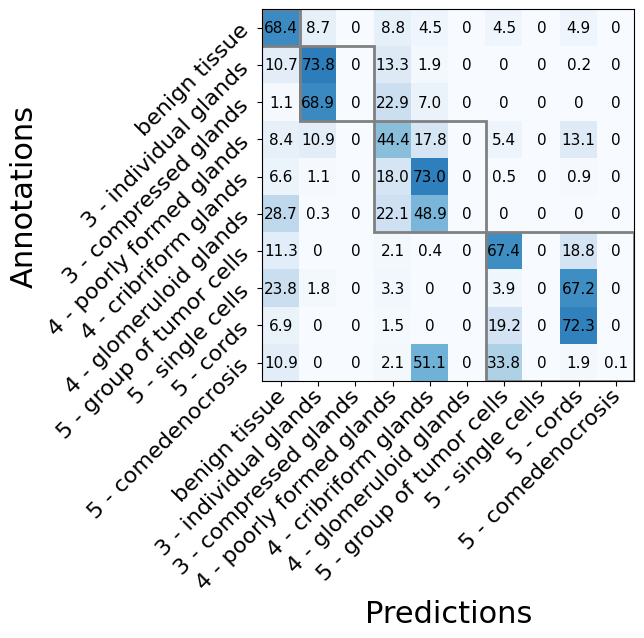

In [9]:
# Confusion Matrix

torch.set_printoptions(sci_mode=False)
classes_named = data.classes_named
classes_named = ["benign tissue", "3 - individual glands", "3 - compressed glands", "4 - poorly formed glands",
                 "4 - cribriform glands", "4 - glomeruloid glands", "5 - group of tumor cells", "5 - single cells", "5 - cords", "5 - comedenocrosis"]
confm = ccmm.float().mean(dim=0)

confm_normed = confm / confm.sum(dim=1).reshape(-1, 1)
confm_normed = (confm_normed * 1000).round().long()

confm_expanded = confm_normed
original_cmap = cm.get_cmap("Blues")
im = plt.matshow(confm_expanded, cmap=LinearSegmentedColormap.from_list("Blues_80", original_cmap(np.linspace(0, 0.7, 256))))

for (i, j), val in np.ndenumerate(confm_expanded):
    if val/10 < 0.01:
        s = "0"
    else:
        s = f'{val/10:.1f}'
    plt.text(j, i, s, ha='center', va='center', color='black', size=11)

# plt.colorbar(im)
plt.xticks(range(num_classes), list(map(lambda x: x, classes_named)),  # + ["Proportion"],
           rotation=45, rotation_mode="anchor", ha="right", va="center_baseline", fontsize=16)

plt.yticks(range(num_classes), list(map(lambda x: x, classes_named))  # + ["Proportion"]
           , rotation=45, fontsize=16)
plt.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)

plt.ylabel("Annotations", fontsize=22)
plt.xlabel("Predictions", fontsize=22)


# Adding grey unfilled squares on the diagonal
diagonal_boxes = [
    (0, 0, 1, 1),
    (1, 1, 2, 2),
    (3, 3, 3, 3),
    (6, 6, 4, 4),  

]

for x, y, width, height in diagonal_boxes:
    rect = Rectangle((y - 0.5, x - 0.5), width, height, fill=False, edgecolor='grey', linewidth=2)
    plt.gca().add_patch(rect)

plt.savefig(fig_dir / "confmatrix.svg", dpi=1000)

In [10]:
confm = ccmm.float().mean(dim=0)

groups = {
    'benign tissue': [0],
    'Gleason pattern 3': [1, 2],
    'Gleason pattern 4': [3, 4, 5],
    'Gleason pattern 5': [6, 7, 8, 9]
}

grouped_matrices = []
for confusion_matrix in ccmm:
    confusion_matrix = confusion_matrix.float()
    grouped_matrix = np.zeros((len(groups), len(groups)))

    # Map classes to their groups
    class_to_group = {}
    for group_idx, (group, class_indices) in enumerate(groups.items()):
        for class_index in class_indices:
            class_to_group[class_index] = group_idx

    # Compute the grouped confusion matrix
    for i in range(10): 
        for j in range(10): 
            grouped_matrix[class_to_group[i], class_to_group[j]] += confusion_matrix[i, j]

    grouped_matrices.append(grouped_matrix)

g_confm = np.mean(grouped_matrices, axis=0)

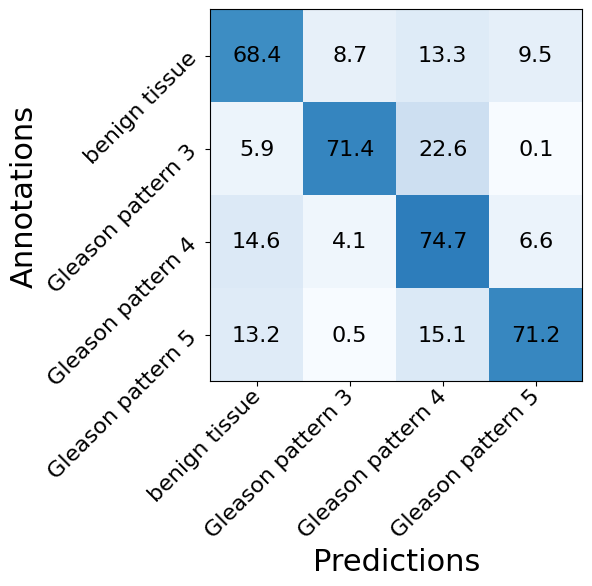

In [11]:
confm_normed = g_confm / np.sum(g_confm, axis=1).reshape(-1, 1)
confm_normed = (confm_normed * 1000).round()
confm_expanded = confm_normed
original_cmap = cm.get_cmap("Blues")
im = plt.matshow(confm_expanded, cmap=LinearSegmentedColormap.from_list("Blues_80", original_cmap(np.linspace(0, 0.7, 256))))

for (i, j), val in np.ndenumerate(confm_expanded):
    if val/10 < 0.01:
        s = "0"
    else:
        s = f'{val/10:.1f}'
    plt.text(j, i, s, ha='center', va='center', color='black', size=16)

# plt.colorbar(im)
plt.xticks(range(len(groups.keys())), list(groups.keys()),
           rotation=45, rotation_mode="anchor", ha="right", va="center_baseline", fontsize=16)

plt.yticks(range(len(groups.keys())), list(groups.keys())
           , rotation=45, fontsize=16)
plt.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)

plt.ylabel("Annotations", fontsize=22)
plt.xlabel("Predictions", fontsize=22)

plt.savefig(fig_dir / "pattern_confmatrix.svg", dpi=500)

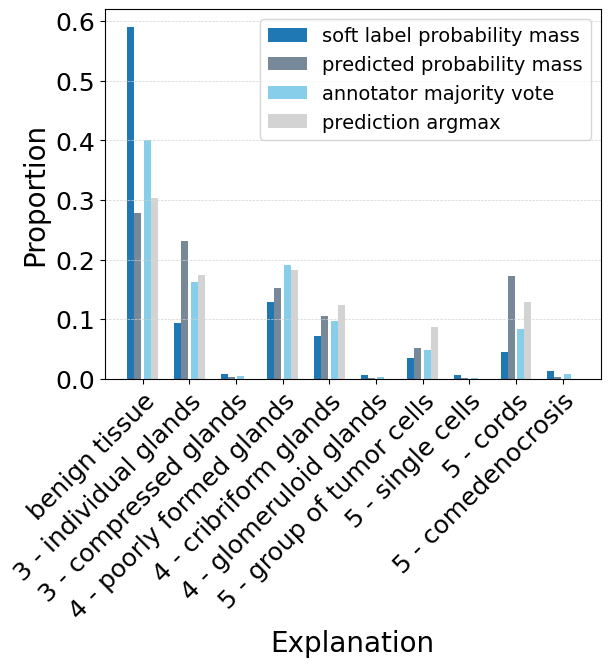

In [12]:
# Class annotation and prediction frequency

a = torch.sum(torch.stack([pred.sum(dim=(1, 2)) for pred in preds]),dim=0)
a /= a.sum()

b = torch.sum(torch.stack([label.sum(dim=(1, 2)) for label in labels]), dim=0)

b /= b.sum()


bar_width = 0.15
plt.bar(np.arange(num_classes)-1.7*bar_width, b, label="soft label probability mass", width=bar_width)
plt.bar(np.arange(num_classes)-0.7*bar_width, a, label="predicted probability mass", width=bar_width, color='lightslategray')

plt.bar(np.arange(num_classes)+0.7*bar_width, max_freq/torch.sum(max_freq), label="annotator majority vote", width=bar_width, color='skyblue')
# plt.bar(np.arange(num_classes)+1.5*bar_width, one_annotator_pred_freq/torch.sum(max_freq), label="one_annotator_pred_freq", width=bar_width)
plt.bar(np.arange(num_classes)+1.7*bar_width, pred_freq/torch.sum(pred_freq), label="prediction argmax", width=bar_width, color='lightgray')

# plt.yscale("log")
_ = plt.legend(fontsize=14)
_ = plt.xticks(np.arange(num_classes), list(map(lambda x: x[:24], classes_named)), rotation=45, ha="right", rotation_mode="anchor", fontsize=18)
_ = plt.yticks(fontsize=18)
_ = plt.xlabel("Explanation", fontsize=20)
_ = plt.ylabel("Proportion", fontsize=20)

plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

plt.savefig(fig_dir / "proportions.svg", dpi=1000)

# Compute number of unqiue max forground pixels and create Figure 4

In [13]:
# Evaluate the number of foreground and unique_max pixels for label level
# Additionally, calculate the agreement between annotators for each class


# --------------------------------------------------------------------------------
# SETTINGS
LABEL_LEVEL_UNIQUE_MAX = 1
# --------------------------------------------------------------------------------

def get_untransformed_data(label_level, path, split):
    data = GleasonX(path, split=split,  **{"scaling": "MicronsCalibrated", "transforms": None, "label_level": label_level, "create_seg_masks": True, "tissue_mask_kwargs": {
                    "open": False, "close": False, "flood": False}, "drawing_order": "grade_frame_order", "explanation_file": "final_filtered_explanations_df.csv", "data_split": (0.7, 0.15, 0.15)}
                )
    return data

count_unique_max, count_foreground, label_counts = count_unique_max_and_agreement(get_untransformed_data(LABEL_LEVEL_UNIQUE_MAX, base_path, "all"))

print(f"Unique Max for label level {LABEL_LEVEL_UNIQUE_MAX}: {count_unique_max/count_foreground}")

pixel_agreement = label_counts[:, 1:]/label_counts[:, 1:].sum(dim=1).reshape(-1, 1)
percentages = label_counts[:, 1:].sum(dim=1)/label_counts[:, :].sum(dim=1)

print("Name of class; proportion of pixels annotated by at least one annotator; agreement between annotators from 1 to 3")
for i, c in enumerate(class_names):
    s = f"{c}: {label_counts[i, 1:].sum()/label_counts[i,:].sum():0.2f}, {list(pixel_agreement[i].numpy()*100)}"
    print(s)

100%|██████████| 1015/1015 [02:13<00:00,  7.58it/s]

Unique Max for label level 1: 0.8641366958618164
Name of class; proportion of pixels annotated by at least one annotator; agreement between annotators from 1 to 3
benign tissue: 0.55, [34.71717, 22.768244, 42.514584]
individual glands: 0.20, [33.535694, 29.372484, 37.091816]
compressed glands: 0.03, [89.606026, 10.2130375, 0.18093213]
poorly formed glands: 0.36, [48.294765, 29.063997, 22.641232]
cribriform glands: 0.20, [59.440292, 25.240225, 15.319486]
glomeruloid glands: 0.02, [88.6845, 10.646041, 0.66945446]
group of tumor cells: 0.11, [70.459366, 19.327833, 10.212793]
single cells: 0.03, [94.96146, 4.066731, 0.9718132]
cords: 0.13, [51.46587, 32.386528, 16.147604]
comedenocrosis: 0.05, [88.46429, 7.3667183, 4.169003]


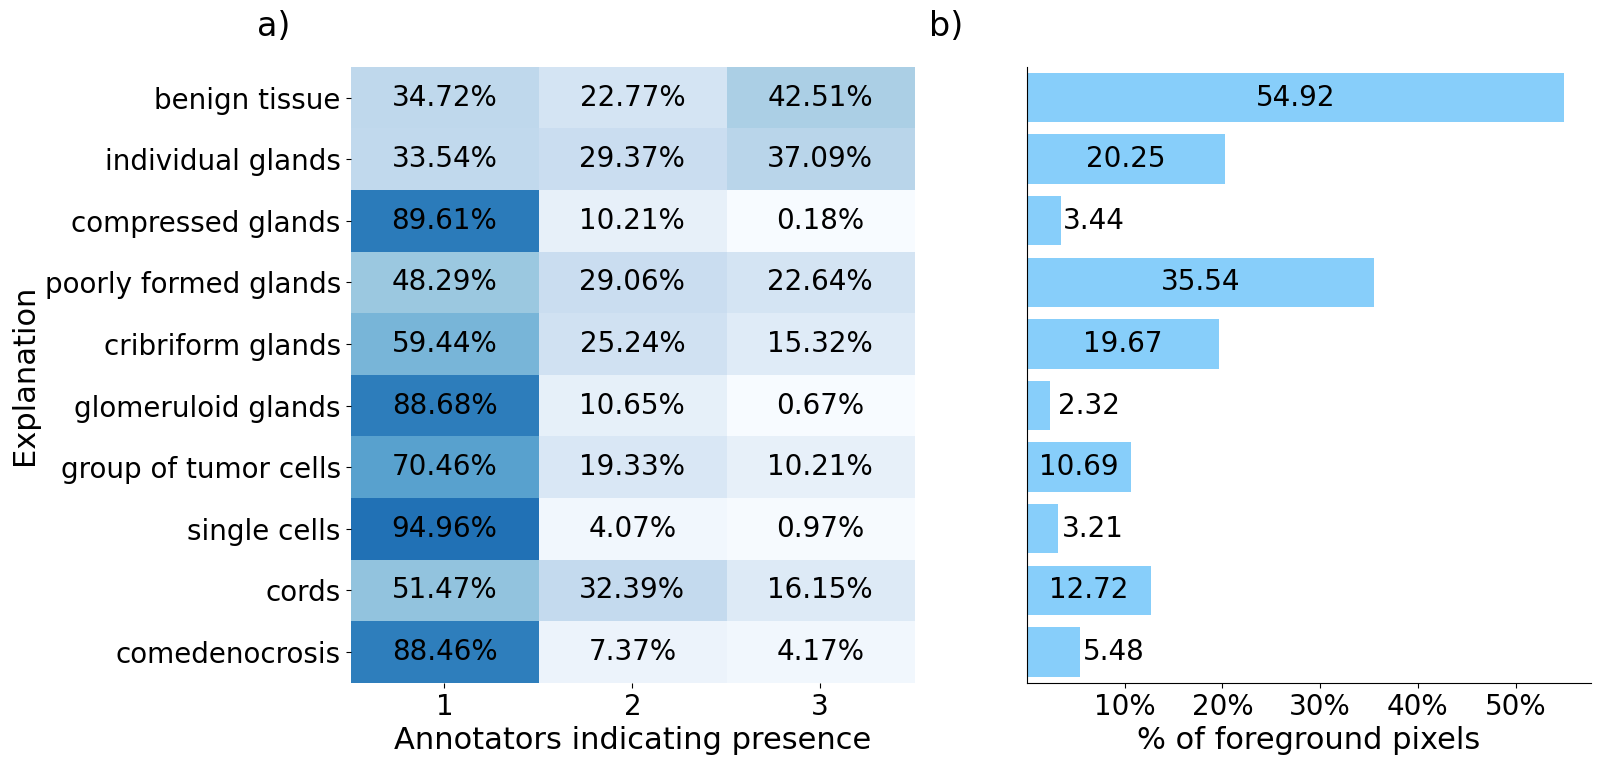

In [14]:
# Create figure 4
# --------------------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1], 'hspace':-4.0}, sharey=True)

fontsize_axis = 22
fontsize=20
fontsize_label = 20
fontsize_bar = 20


cmap = ListedColormap(cm["Blues"](np.linspace(0, 1, 1000))[:-250])

# First subplot: pixel agreement as a heatmap on the left
im = ax1.matshow(pixel_agreement*100, cmap=cmap, aspect='auto')

# Set xtick labels for the heatmap as 1, 2, and 3
ax1.set_xticks(np.arange(pixel_agreement.shape[1]))
ax1.set_xticklabels([1, 2, 3], fontsize=fontsize)
ax1.set_xlabel("Annotators indicating presence", fontsize=fontsize_axis)
ax1.set_ylabel("Explanation", fontsize=fontsize_axis)
ax1.set_yticks(np.arange(len(class_names)))
ax1.set_yticklabels(class_names, fontsize=fontsize)
# ax1.set_title("Number of annotators per explanation annotated pixels")
# Loop over data dimensions and create text annotations for the heatmap
for i in range(pixel_agreement.shape[0]):
    for j in range(pixel_agreement.shape[1]):
        ax1.text(j, i, f"{pixel_agreement[i, j]*100:.2f}%",
                 ha="center", va="center", color="black", fontsize=fontsize_label)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)


# Add color bar for pixel agreement
#cbar = fig.colorbar(im, ax=ax1)

# Second subplot: percentages as a horizontal bar chart on the right
ax2.barh(class_names, percentages, color='lightskyblue')

for i, p in enumerate(percentages):
        if i in [2, 5, 7]:
            ax2.text(
                percentages[i].item()/2 + 0.02,# max(percentages[i].item()/2, 0.02) + 0.02,
                i,
                f"{percentages[i].item()*100:.2f}",
                ha='left',
                va='center',
                fontsize=fontsize_bar
            )
        elif i == 9:
             ax2.text(
                percentages[i].item()/2 + 0.03,# max(percentages[i].item()/2, 0.02) + 0.02,
                i,
                f"{percentages[i].item()*100:.2f}",
                ha='left',
                va='center',
                fontsize=fontsize_bar
            )
        else:
            ax2.text(
                max(percentages[i].item()/2, 0.02),
                i,
                f"{percentages[i].item()*100:.2f}",
                ha='center',
                va='center',
                fontsize=fontsize_bar
            )

ax2.set_xlabel("% of foreground pixels", fontsize=fontsize_axis)
ax2.set_xticks([0.1,0.2,0.3,0.4,0.5], ["10%", "20%", "30%", "40%", "50%"], fontsize=fontsize_label)
# Invert y-axis to match the order of class names
ax2.invert_yaxis()

# Hide y-labels for the barplot
ax2.get_yaxis().set_visible(False)
# ax2.set_title("Percentage of foreground pixels annotated for an explanation")


# Adjust layout to ensure everything fits
ax1.invert_yaxis()
ax1.xaxis.set_ticks_position('bottom')  # Ensure x-ticks are at the bottom
ax1.text(-1.0, -1, "a)", size=24)
ax2.text(-0.1, -1, "b)", size=24)

# Display the plot
plt.savefig("figures/pixelagreement.svg", dpi=500)

# Agreement and Class Distribution

In [15]:
import os
from pathlib import Path

In [16]:
# %%
in_path = Path("./output")
out_path = Path("./output")

In [17]:
creation_in_path = Path(os.environ["DATASET_LOCATION"]) / "GleasonXAI"
dataset = GleasonX(creation_in_path, split='all', scaling='MicronsCalibrated', label_level=1, create_seg_masks=True, drawing_order='grade_frame_order', explanation_file='final_filtered_explanations_df.csv', data_split=[0.7, 0.15, 0.15], tissue_mask_kwargs={'open': False, 'close':False, 'flood':False})

### Fleiss Kappa Boxplot

In [18]:
import random
from calculate_fleiss_kappa import calculate_kappa_per_group_and_label

In [ ]:
# use_sub_expl: set calculation to be done on sub-explanation level (True), explanation level (False) or pattern level (None)
# ! Sub-Explanation level takes a lot of time (ca. 25min) !
use_sub_expl = True

In [19]:
%%capture
prefix = "pattern" if use_sub_expl == None else "sub-expl" if use_sub_expl == True else "expl"

if not (in_path / prefix / f"{prefix}_kappas.csv").exists():
    random.seed(42)
    calculate_kappa_per_group_and_label(dataset.df, in_path, use_sub_explanations=use_sub_expl)

/tmp/ipykernel_735471/1607638729.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bp.set_yticklabels(renamed_labels)


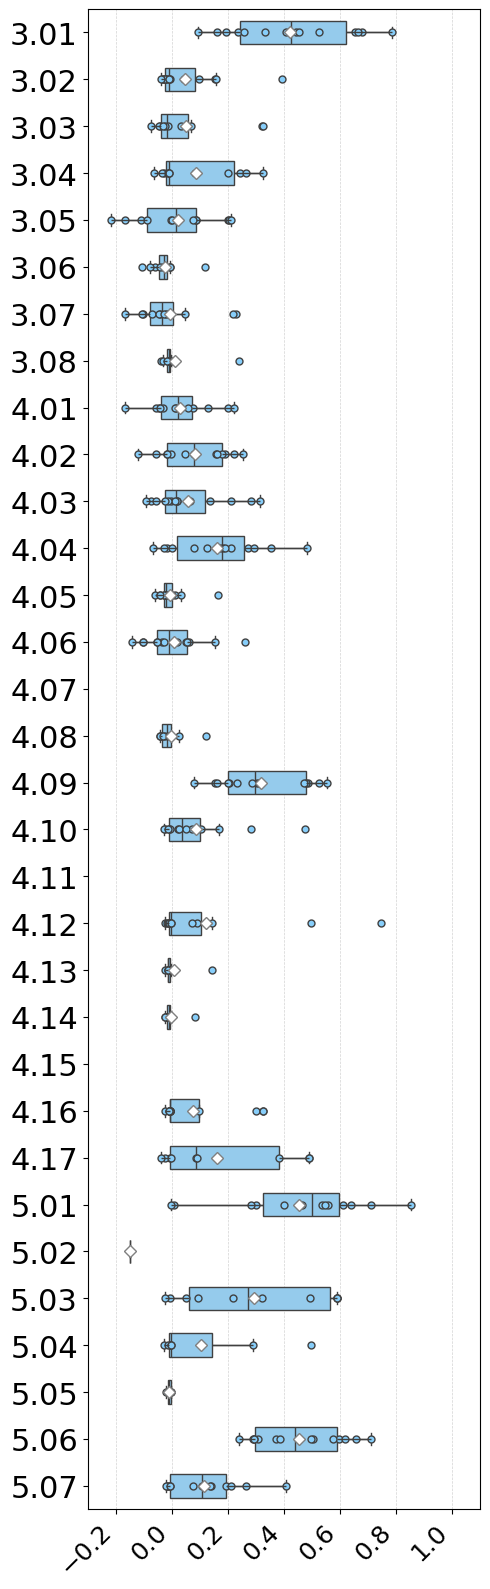

In [21]:
kappas_df = pd.read_csv(in_path / prefix /  f"{prefix}_kappas.csv")
renamed_labels = np.load(in_path / prefix / f"{prefix}_kappas_y-lables.npy")

figsize = (6, 2.6) if use_sub_expl == None else (5,16) if use_sub_expl == True else (10, 9)
plt.figure(figsize=(figsize))
ax_bp = sns.boxplot(data=kappas_df.T[1:], color='lightskyblue', showfliers=False, width=0.5, native_scale=False, orient='h') #data=kappas_df.T, palette=cmap
plt.xlim(-0.3, 1.1)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='lightgray')
ax_bp.set_yticklabels(renamed_labels)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=22)
sns.stripplot(data=kappas_df.T[1:], color='lightskyblue', jitter=False, linewidth=1, orient='h')
sns.boxplot(data=kappas_df.T[1:], showfliers=False, medianprops={'visible': False}, showbox=False, showcaps=False, width=0.5, native_scale=False, orient='h', showmeans=True, meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"gray"}, zorder=10) #data=kappas_df.T, palette=cmap


plt.tight_layout()
plt.savefig(fig_dir / f"{prefix}_boxplot_kappas.svg", dpi=1000)

# plt.clf()
# plt.cla()
# plt.close()
plt.show()

### Rater Agrement

In [22]:
from calculate_dataset_characteristics import agreement_occurrence_per_class, plot_three_rater_agreement_occurrence

In [23]:
use_sub_expl = True
prefix = 'expl' if use_sub_expl == False else 'sub-expl' if use_sub_expl == True else 'grade'
ylbl = 'Explanation' if use_sub_expl == False else 'Sub-Explanation' if use_sub_expl == True else 'Gleason Pattern'

In [24]:
#%%capture
if not (in_path / f"{prefix}_rater_agreement.csv").exists():
     ca_dict = (agreement_occurrence_per_class(dataset.df, use_sub_expl, True))
     plot_three_rater_agreement_occurrence(ca_dict, dataset.df,  in_path, use_sub_expl)


total TMAs: 1015


In [27]:
rdf = pd.read_csv(in_path / f"{prefix}_rater_agreement.csv")
fig_size = (7, 15) if use_sub_expl == True else (10,9) if use_sub_expl == False else (6.3, 3)
fig, ax = plt.subplots(figsize=fig_size)
# ax = sns.heatmap(rdf.T[1:], annot=True, fmt='g', cmap='Blues', square=False, cbar=False, annot_kws={"size": 14 if use_sub_expl == True else 22 }, linewidths=.5)#cbar_kws={"shrink": 0.2})
ax = sns.heatmap(rdf[1:].T[1:], annot=True, fmt='g', cmap='Blues', square=False, cbar=False, annot_kws={"size": 14 if use_sub_expl == True else 22 }, linewidths=.5)#cbar_kws={"shrink": 0.2})
#plt.title('co-occurence of label decisions between three raters\n(per label)')
plt.xlabel('Annotators Indicating Agreement', fontsize=22)
plt.ylabel(ylbl, fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.set_yticklabels(ax.get_yticklabels(), rotation='horizontal')
plt.tight_layout()
plt.savefig(fig_dir / f"{prefix}_agreement_occurences.png", dpi=1000)
# plt.cla()
# plt.clf()
# plt.close()
plt.show()


### Image vs Annotator Grade

In [22]:
from calculate_dataset_characteristics import compare_tma_and_explanation_grade

In [23]:
%%capture
if not (in_path / f"image_vs_annotation_grade.csv").exists():
    compare_tma_and_explanation_grade(dataset.df, in_path)

In [24]:
cm_df = pd.read_csv(in_path / f"image_vs_annotation_grade.csv").iloc[:,1:]
plt.figure(figsize=(3.5,3))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False, square=True, annot_kws={"size": 14}, linewidths=.5)
# plt.title("Confusion Matrix: TMA grade to Explanation Grade")
plt.xlabel('Annotation Gleason pattern', fontsize=14)
plt.ylabel('Image score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(fig_dir / "cm_class_comparison.png", dpi=1000)

plt.clf()
plt.cla()
plt.close()

### Class distribution

In [25]:
from calculate_dataset_characteristics import get_class_cooccurrence_between_labelers

In [26]:
use_sub_expl = True
prefix = 'expl' if use_sub_expl == False else 'sub-expl' if use_sub_expl == True else 'grade'
ylbl = 'Explanation' if use_sub_expl == False else 'Sub-Explanation' if use_sub_expl == True else 'Gleason Pattern'

In [27]:
%%capture
distr_in_path = in_path / "class_dist"
if not (distr_in_path / "sub-expl_label.npy").exists():
    for usage in [True, False, None]:
        get_class_cooccurrence_between_labelers(dataset.df, usage, True, in_path)
    

In [28]:
distr_in_path = in_path / "class_dist"
assert os.path.exists(distr_in_path)

grade_lbl = np.load(distr_in_path / "grade_label.npy")
grade_val = np.load(distr_in_path / "grade_value.npy")

grade_lbl = ["Gleason Pattern " + c_lbl for c_lbl in grade_lbl]

expl_lbl = np.load(distr_in_path / "sub-expl_label.npy")
expl_val = np.load(distr_in_path / "sub-expl_value.npy")

grouped_lbl =np.load(distr_in_path / "expl_label.npy")
grouped_val = np.load(distr_in_path / "expl_value.npy")

# cmap = 'Blues'#{'3':'forestgreen', '4': 'royalblue', '5': 'firebrick'}
# cmap_raw = 'Blues'#{i: "forestgreen" if i < 8 else "royalblue" if i < 25 else 'firebrick' for i in range(0, len(expl_lbl))} 
# cmap_grouped = 'Blues'#{i: "forestgreen" if i < 2 else "royalblue" if i < 5 else 'firebrick' for i in range(0, len(grouped_lbl))} 

sns.set_theme(style="ticks")

ybar_fontsize = 19
single_fontsize = 22

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5), width_ratios=[0.09, 0.91])
ax1.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')
ax1.tick_params(axis='y', labelsize=single_fontsize)
ax1.set_ylim((0,900))

ax2.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')
ax2.tick_params(axis='y', labelsize=single_fontsize)
ax2.set_ylim((0,900))

bar_width = 0.5
bar_spacing = 0.1
positions_grade = np.arange(len(grade_lbl)) * (bar_width + bar_spacing)
positions_expl = np.arange(len(expl_lbl)) * (bar_width + bar_spacing)

bars1 = ax1.bar(positions_grade, grade_val, width=0.3, color='#77b5d9')#[cmap[cat] for cat in grade_lbl])
ax1.set_xticks(positions_grade)
ax1.set_xticklabels(grade_lbl, fontsize=single_fontsize, rotation=45)

bars2 = ax2.bar(positions_expl, expl_val, width=0.3, color='#77b5d9')#[cmap_raw[i] for i in range(len(expl_lbl))])
ax2.set_xticks(positions_expl)
ax2.set_xticklabels(expl_lbl, fontsize=single_fontsize, rotation=45)


for bar, value in zip(bars1, grade_val):
    ax1.text(bar.get_x() + bar.get_width() / 2, value + 0.5, str(value), ha='center', va='bottom', color='black', fontsize=ybar_fontsize)
for bar, value in zip(bars2, expl_val):
    ax2.text(bar.get_x() + bar.get_width() / 2, value + 0.5, str(value), ha='center', va='bottom', color='black', fontsize=ybar_fontsize)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(fig_dir / "class_dist_grade_expl.svg", dpi=1000)
plt.cla()
plt.close()

plt.rcParams['ytick.labelsize'] = single_fontsize

plt.figure(figsize=(8, 7))
plt.ylim((0,900))
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

positions_grouped = np.arange(len(grouped_lbl)) * (bar_width + bar_spacing)

bars = plt.bar(positions_grouped, grouped_val, width=0.3, color='#77b5d9')#[cmap_grouped[i] for i in range(len(grouped_lbl))])

plt.xticks(positions_grouped, grouped_lbl, rotation=45, ha='right', fontsize=single_fontsize)
plt.yticks(fontsize=single_fontsize)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

# Add y value labels at the bottom of each bar
for bar, value in zip(bars, grouped_val):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.5, str(value), ha='center', va='bottom', color='black', fontsize=ybar_fontsize)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir / "class_dist_explanation.svg", dpi=1000)
# %%


# Visualizations

In [29]:
conf_matrix = ccmm.float().mean(dim=0)
preds_ensemble = preds
confm_ml = conf_matrix
confm_ml_reshape = confm_ml.reshape(confm_ml.shape[0], -1)
num_pixels = confm_ml_reshape.sum(dim=1)
confm_ml_reshape_normed = confm_ml_reshape / num_pixels.reshape(-1, 1)

TN, FP, FN, TP = confm_ml_reshape[:, 0], confm_ml_reshape[:, 1], confm_ml_reshape[:, 2], confm_ml_reshape[:, 3]

P = (TP+FN)
N = (TN+FP)

POPU = (TN+FP+FN+TP)
ACC = (TN+TP)/POPU
TPR = TP/(TP+FN)
TNR = (TN/(TN+FP))
PREC = TP/(FP+TP)
BACC = (TPR+TNR) / 2
DICE = (2*TP)/(2*TP+FP+FN)

PREL = P / POPU

confm_ml_reshape_normed = torch.cat([PREL.reshape(num_classes, 1), confm_ml_reshape_normed[:, [3,0,1,2]], ACC.reshape(
    num_classes, 1), PREC.reshape(num_classes, 1), BACC.reshape(num_classes, 1), DICE.reshape(num_classes,1)], dim=1)

im3 = plt.matshow(confm_ml_reshape_normed)
plt.colorbar(im3)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7,8], ["PREL", "TP", "TN", "FP", "FN", "ACC", "PREC", "BA", "DICE"], rotation=45)
_ = plt.yticks(range(len(classes_named)), classes_named)
_ = plt.xlabel("Metrics in %")
for (i, j), val in np.ndenumerate(confm_ml_reshape_normed):
    plt.text(j, i, f"{val*1000:0.0f}",c="red", ha="center", va="center")

In [ ]:
good_idcs = [4, 16, 22, 25, 29, 30, 35, 52, 53, 54, 84, 90, 113, 114, 142]
interest_cases = [ 85, 79, 105]
bad_cases =[66,83]
57,108, 133, 151
final_preds = [57,108,54, 4, 84, 85, 105, 66, 83]

create_multi_seg_anno_plot(predictions=preds, dataset=data, idcs=final_preds, strip_background=True, legend=True, class_names=class_names)
plt.savefig(fig_dir / "imgs_final_paper.png", dpi=100)

In [ ]:
@wid.interact(idx=wid.IntSlider(min=0, max=len(data)-1, value=0))
def show_worst_results(idx):
    _ = create_single_class_acti_maps(predictions=preds_ensemble, dataset=data, idx=idx, plot_mode="heatmap", strip_background=True)
    # _ = create_ensemble_plot(dataset=data, ensemble_predictions=preds_ensemble, individual_predictions=preds, idx=idcs[idx], show_ensemble_preds=0)